In [237]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import tensorflow_hub as hub
import os
import random 
import matplotlib.image as mpimg
import pathlib
import tf_keras
import datetime

In [238]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [239]:
print("Tensorflow version =",tf.__version__)
print("Pandas version =",pd.__version__)
print("Numpy version =",np.version.version)
print(f"TensorFlow version: {tf.__version__}")
print(f"TensorFlow Hub version: {hub.__version__}")

Tensorflow version = 2.16.2
Pandas version = 2.2.2
Numpy version = 1.26.4
TensorFlow version: 2.16.2
TensorFlow Hub version: 0.16.1


In [240]:
def view_random_pic(target_dir,target_class):
    """Takes a target directory and a target class and displays random pictures"""
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)
    img = mpimg.imread(target_folder+"/"+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    plt.show()
    return img

['281009.jpg']


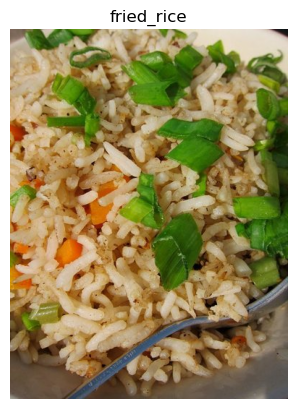

In [241]:
img = view_random_pic("/Users/veerjyotsammi/PycharmProjects/ML Playground/TransferedLearning/10_food_classes_10_percent/train/","fried_rice")

In [242]:
data_dir = pathlib.Path("/Users/veerjyotsammi/PycharmProjects/ML Playground/TransferedLearning/10_food_classes_10_percent/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [243]:
train_datagen = ImageDataGenerator(rescale=1./512,rotation_range=5,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)
test_datagen = ImageDataGenerator(rescale=1./512,rotation_range=5,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)

train_dir = "/Users/veerjyotsammi/PycharmProjects/ML Playground/TransferedLearning/10_food_classes_10_percent/train"
test_dir = "/Users/veerjyotsammi/PycharmProjects/ML Playground/TransferedLearning/10_food_classes_10_percent/test"

train_data = train_datagen.flow_from_directory(directory=train_dir,batch_size=16,target_size=(512,512),class_mode="categorical",seed=42,shuffle=True)
test_data = test_datagen.flow_from_directory(directory=test_dir,batch_size=16,target_size=(512,512),class_mode="categorical",seed=42,shuffle=True)
len(train_data),len(test_data)

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


(47, 157)

In [244]:
def create_tensorboard_callbacks(dir_name,experiment_name):
    log_dir = dir_name+"/"+experiment_name+"/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    print("saving Tensorboard log files to :",log_dir)
    return tensorboard_callback
    

In [245]:
def create_model(url, num_classes):
    """
    Takes in TensorFlow HUB URL and number of classes and creates a model.
    :param url: TensorFlow HUB URL
    :param num_classes: Number of classes for output
    :return: Model created from TensorFlow HUB URL and number of classes
    """
    model = tf_keras.Sequential([
        hub.KerasLayer(url, input_shape=(512, 512, 3), trainable=False, name="feature_extraction"),
        tf_keras.layers.Dense(num_classes, activation="softmax")
    ])

    return model

# Example usage
model = create_model("https://tfhub.dev/google/imagenet/resnet_v2_101/feature_vector/5", 10)
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction (KerasL  (None, 2048)              42626560  
 ayer)                                                           
                                                                 
 dense_12 (Dense)            (None, 10)                20490     
                                                                 
Total params: 42647050 (162.69 MB)
Trainable params: 20490 (80.04 KB)
Non-trainable params: 42626560 (162.61 MB)
_________________________________________________________________


In [246]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer="adam",
              metrics=['accuracy'])

In [251]:
resnet_history = model.fit(train_data ,epochs=10, validation_data=test_data,steps_per_epoch=len(train_data),validation_steps=len(test_data),verbose=1)

Epoch 1/10
47/47 [==============================] - 98s 2s/step - loss: 0.3430 - accuracy: 0.9093 - val_loss: 0.5361 - val_accuracy: 0.8296
Epoch 2/10
47/47 [==============================] - 98s 2s/step - loss: 0.3266 - accuracy: 0.9280 - val_loss: 0.5172 - val_accuracy: 0.8392
Epoch 3/10
47/47 [==============================] - 97s 2s/step - loss: 0.2987 - accuracy: 0.9320 - val_loss: 0.5287 - val_accuracy: 0.8312
Epoch 4/10
47/47 [==============================] - 97s 2s/step - loss: 0.2838 - accuracy: 0.9333 - val_loss: 0.5172 - val_accuracy: 0.8300
Epoch 5/10
47/47 [==============================] - 97s 2s/step - loss: 0.2652 - accuracy: 0.9373 - val_loss: 0.4989 - val_accuracy: 0.8412
Epoch 6/10
47/47 [==============================] - 97s 2s/step - loss: 0.2469 - accuracy: 0.9493 - val_loss: 0.5047 - val_accuracy: 0.8392
Epoch 7/10
47/47 [==============================] - 97s 2s/step - loss: 0.2417 - accuracy: 0.9467 - val_loss: 0.5047 - val_accuracy: 0.8300
Epoch 8/10
47/47 [==

<Axes: >

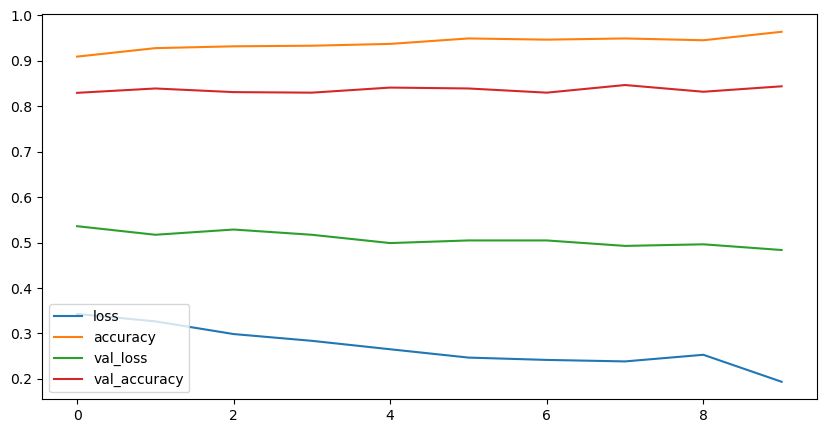

In [254]:
pd.DataFrame(resnet_history.history).plot(figsize=(10,5))

In [256]:
model.save("resnet_model.keras")